# FCChh impedance model
For injection energy 3.3TeV
Plot and save the impedances

### 1) Import libraries

In [1]:
%pylab notebook

import sys
import commands
from string import *
import time
import numpy as np
from copy import deepcopy
import os,re
from io_lib import *
from tables_lib import select_in_table
from particle_param import *
from Impedance import *
from DELPHI import *
from BSH_coll import FCChh_param
#The convergence is checked in these simulations



Populating the interactive namespace from numpy and matplotlib
('-f', '/afs/cern.ch/user/d/damorim/.local/share/jupyter/runtime/kernel-57eb9a8a-1770-40d1-b0df-dff89bdae3cc.json')


### 2) Parameters

In [2]:
# beam parameters
e,m0,c,E0=proton_param();

#Injection
E=3.3e12
V=12e6 #RF voltage

#Top Energy
# E=50e12
# V=16e6 #RF voltage

nevery=1; # downsampling of the impedance (take less points than in the full model)

# setting the scans
planes=['x'];

imp_mod_list=[]; # complete list of impedance scenarios
wake_mod_list=[];# complete list of wake scenarios

machine_str,E,gamma,sigmaz,taub,R,Qx,Qxfrac,Qy,Qyfrac,Qs,eta,f0,omega0,omegas,dphase,Estr=FCChh_param(E=E,V=V)
    #machine=LHC(E0,E=Escan[subscan[iscenario]],scenario=model[subscan[iscenario]])

g,a,b=longdistribution_decomp(taub,typelong="Gaussian");
avbetax=R/Qx;avbetay=R/Qy; # average beta functions used
    #print "scenario: ",scenario

3TeV


In [3]:
print Qx, Qy, Qs, omegas, gamma, taub
print taub*c/4

120.31 120.32 0.00262256277315 48.4796919623 3517.10380975 1.06740514778e-09
0.0800000032336


In [4]:
# Check TCP.C6L2
en=2.2e-6
7.2*np.sqrt(en/gamma*753.9)

0.0049443375797244473

In [5]:
#Check TCP.D6L2
en=2.2e-6
7.2*np.sqrt(en/gamma*390.8)

0.0035598239521163568

In [6]:
ResultDir='/afs/cern.ch/work/d/damorim/work/DELPHI_results/FCChh/';

<IPython.core.display.Javascript object>


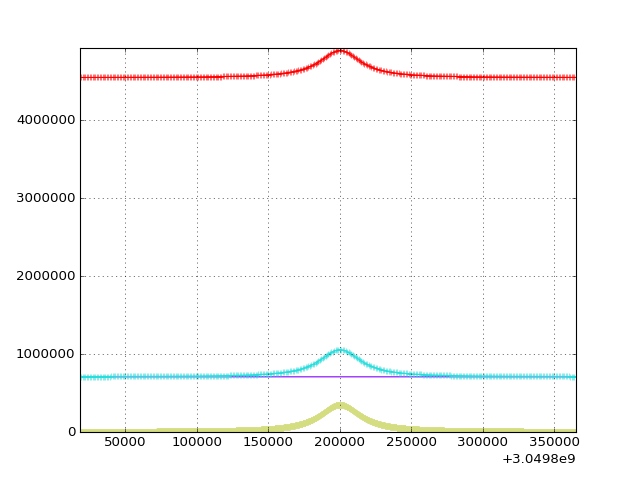

In [46]:
#print 'Loading from impedance database...'+scenario

scenario_scan=np.array(['BS_only_3TeV_V1',
                    'BSH_3TeV',
                    'BS_interconnects_3TeVV1',
                    'BSH_interconnects_3TeVV1'])

label_scan=np.array(['Beam Screen',
                     'Beam screen + Holes',
                     'Beam screen + Interconnects',
                     'Beam screen + Holes + Interconnects'])


scenario_scan=np.array(['BS_only_3TeV_V1',
                    'BS_interconnects_3TeVV1',
                    'Interconnects_only_3TeVV1',
                       'BSH_interconnects_3TeVV1'])

label_scan=np.array(['Beam Screen',
                     'Beam screen + Interconnects',
                     'Interconnects',
                    'Beam screen + Holes + Interconnects'])

imp_mod=[]; wake_mod=[];

colors_map = cm.rainbow(np.linspace(0, 1, len(scenario_scan)))

plt.close('all')

for ii_scenario, scenario in enumerate(scenario_scan):
    
    root_result=ResultDir+scenario+'/'
    
    imp_mod=[]; wake_mod=[];
    suffix='_FCChh_Allthemachine_'+Estr+'_halfgap_13mm.dat';
    freq_mod,Z_mod=readZ(root_result+"Zxdip"+suffix);
    #Z_mod*=imp_fact

    imp_mod.append(impedance_wake(a=1,b=0,c=0,d=0,plane='x',var=freq_mod,func=Z_mod));

    #freq_mod,Z_mod=readZ(root_result+"Zydip"+suffix);
    #Z_mod*=imp_fact


    #imp_mod.append(impedance_wake(a=0,b=1,c=0,d=0,plane='y',var=freq_mod,func=Z_mod));

    imp_mod_list.append(imp_mod);
    wake_mod_list.append(wake_mod);



    #Puting the impedance inside a list
    Zlist_RW_R = deepcopy(imp_mod[0].func[::nevery,:])
    freqlist_RW_R = deepcopy(imp_mod[0].var[::nevery])

    #Impedance plot

    plt.plot(freqlist_RW_R, Zlist_RW_R[:,0],label='Re '+label_scan[ii_scenario],marker='+',linestyle='-',color=colors_map[ii_scenario])
    #plt.loglog(freqlist_RW_R, Zlist_RW_R[:,1],label='Im '+label_scan[ii_scenario],linestyle='--',color=colors_map[ii_scenario])


plt.xlim([1.0e9,1e10])
plt.ylim([1.0e1,1.0e7])
#plt.grid()
#plt.legend(loc='lower left',prop={'size':9})
plt.grid()

plt.show()

# A) No collimators

### A1) Model: Beam screen only
BS_only_3TeV_V1

<IPython.core.display.Javascript object>


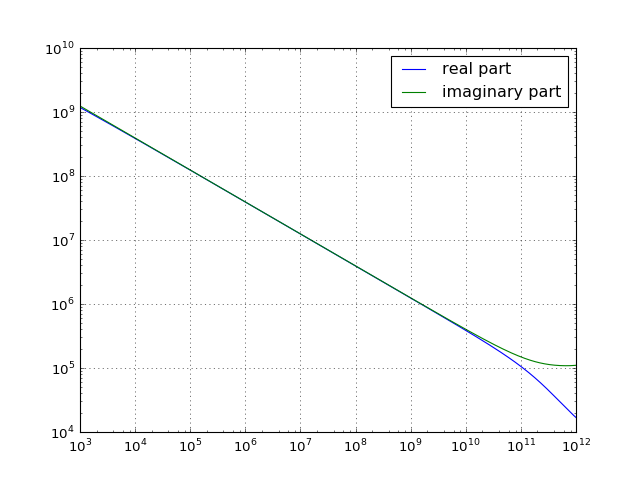

In [17]:
#print 'Loading from impedance database...'+scenario
root_result=ResultDir+'BS_only_3TeV_V1/'

imp_mod=[]; wake_mod=[];
suffix='_FCChh_Allthemachine_'+Estr+'_halfgap_13mm.dat';
freq_mod,Z_mod=readZ(root_result+"Zxdip"+suffix);
#Z_mod*=imp_fact

imp_mod.append(impedance_wake(a=1,b=0,c=0,d=0,plane='x',var=freq_mod,func=Z_mod));

#freq_mod,Z_mod=readZ(root_result+"Zydip"+suffix);
#Z_mod*=imp_fact


#imp_mod.append(impedance_wake(a=0,b=1,c=0,d=0,plane='y',var=freq_mod,func=Z_mod));

imp_mod_list.append(imp_mod);
wake_mod_list.append(wake_mod);



#Puting the impedance inside a list
Zlist_RW_R = deepcopy(imp_mod[0].func[::nevery,:])
freqlist_RW_R = deepcopy(imp_mod[0].var[::nevery])

#Impedance plot
plt.close('all')

plt.figure(1)
plt.loglog(freqlist_RW_R, Zlist_RW_R[:,0], '-b',label='real part')
plt.loglog(freqlist_RW_R, Zlist_RW_R[:,1], '-g',label='imaginary part')
plt.xlim([1.0e3,1.0e12])
plt.ylim([1.0e4,1.0e10])
#plt.grid()
plt.legend()
plt.grid()

plt.show()

Effective impedance, from Sacherer

### A2) Model: Beam screen + Holes
BSH_3TeV

<IPython.core.display.Javascript object>


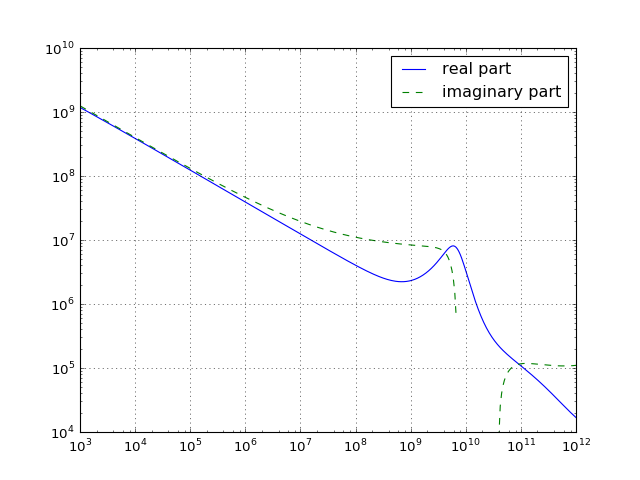

In [18]:
#print 'Loading from impedance database...'+scenario
root_result=ResultDir+'BSH_3TeV/'

imp_mod=[]; wake_mod=[];
suffix='_FCChh_Allthemachine_'+Estr+'_halfgap_13mm.dat';
freq_mod,Z_mod=readZ(root_result+"Zxdip"+suffix);
#Z_mod*=imp_fact

imp_mod.append(impedance_wake(a=1,b=0,c=0,d=0,plane='x',var=freq_mod,func=Z_mod));

#freq_mod,Z_mod=readZ(root_result+"Zydip"+suffix);
#Z_mod*=imp_fact


#imp_mod.append(impedance_wake(a=0,b=1,c=0,d=0,plane='y',var=freq_mod,func=Z_mod));

imp_mod_list.append(imp_mod);
wake_mod_list.append(wake_mod);



#Puting the impedance inside a list
Zlist_RW_R = deepcopy(imp_mod[0].func[::nevery,:])
freqlist_RW_R = deepcopy(imp_mod[0].var[::nevery])

#Impedance plot
plt.close('all')

plt.figure(1)
plt.loglog(freqlist_RW_R, Zlist_RW_R[:,0], '-b',label='real part')
plt.loglog(freqlist_RW_R, Zlist_RW_R[:,1], '--g',label='imaginary part')
plt.xlim([1.0e3,1.0e12])
plt.ylim([1.0e4,1.0e10])
#plt.grid()
plt.legend()
plt.grid()

plt.show()

Effective impedance, from Sacherer

### A3) Model: Beam screen + Interconnects
BS_interconnects_3TeVV1

Q= 86001 (interco)

fr = 3.05GHz

Rs x =  350 kOhm/m

Rs y =  350 kOhm/m

<IPython.core.display.Javascript object>


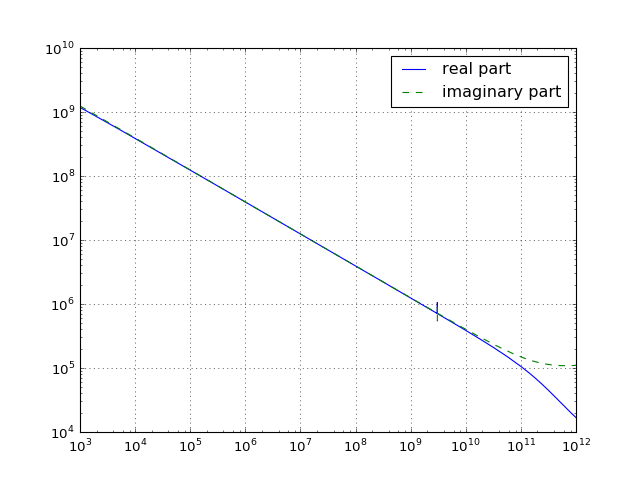

In [19]:
#print 'Loading from impedance database...'+scenario
root_result=ResultDir+'BS_interconnects_3TeVV1/'

imp_mod=[]; wake_mod=[];
suffix='_FCChh_Allthemachine_'+Estr+'_halfgap_13mm.dat';
freq_mod,Z_mod=readZ(root_result+"Zxdip"+suffix);
#Z_mod*=imp_fact

imp_mod.append(impedance_wake(a=1,b=0,c=0,d=0,plane='x',var=freq_mod,func=Z_mod));

#freq_mod,Z_mod=readZ(root_result+"Zydip"+suffix);
#Z_mod*=imp_fact


#imp_mod.append(impedance_wake(a=0,b=1,c=0,d=0,plane='y',var=freq_mod,func=Z_mod));

imp_mod_list.append(imp_mod);
wake_mod_list.append(wake_mod);



#Puting the impedance inside a list
Zlist_RW_R = deepcopy(imp_mod[0].func[::nevery,:])
freqlist_RW_R = deepcopy(imp_mod[0].var[::nevery])

#Impedance plot
plt.close('all')

plt.figure(1)
plt.loglog(freqlist_RW_R, Zlist_RW_R[:,0], '-b',label='real part')
plt.loglog(freqlist_RW_R, Zlist_RW_R[:,1], '--g',label='imaginary part')
plt.xlim([1.0e3,1.0e12])
plt.ylim([1.0e4,1.0e10])
#plt.grid()
plt.legend()
plt.grid()

plt.show()

Effective impedance, from Sacherer

### A4) Model: Beam screen + Holes + Interconnects
BSH_interconnects_3TeVV1

Q= 86001 (interco)

fr = 3.05GHz

Rs x =  350 kOhm/m

Rs y =  350 kOhm/m

<IPython.core.display.Javascript object>


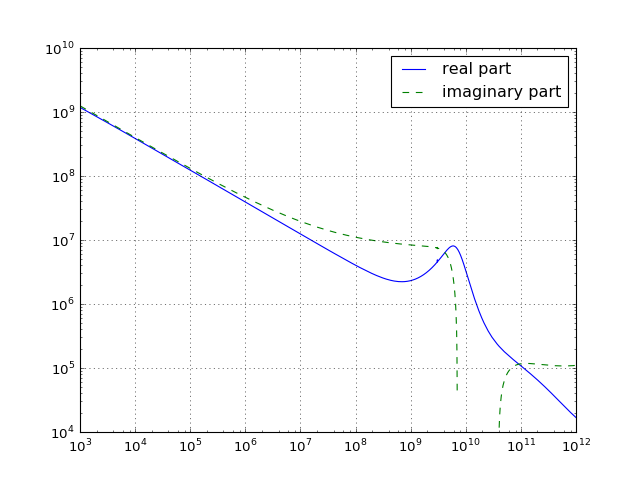

In [20]:
#print 'Loading from impedance database...'+scenario
root_result=ResultDir+'BSH_interconnects_3TeVV1/'

imp_mod=[]; wake_mod=[];
suffix='_FCChh_Allthemachine_'+Estr+'_halfgap_13mm.dat';
freq_mod,Z_mod=readZ(root_result+"Zxdip"+suffix);
#Z_mod*=imp_fact

imp_mod.append(impedance_wake(a=1,b=0,c=0,d=0,plane='x',var=freq_mod,func=Z_mod));

#freq_mod,Z_mod=readZ(root_result+"Zydip"+suffix);
#Z_mod*=imp_fact


#imp_mod.append(impedance_wake(a=0,b=1,c=0,d=0,plane='y',var=freq_mod,func=Z_mod));

imp_mod_list.append(imp_mod);
wake_mod_list.append(wake_mod);



#Puting the impedance inside a list
Zlist_RW_R = deepcopy(imp_mod[0].func[::nevery,:])
freqlist_RW_R = deepcopy(imp_mod[0].var[::nevery])

#Impedance plot
plt.close('all')

plt.figure(1)
plt.loglog(freqlist_RW_R, Zlist_RW_R[:,0], '-b',label='real part')
plt.loglog(freqlist_RW_R, Zlist_RW_R[:,1], '--g',label='imaginary part')
plt.xlim([1.0e3,1.0e12])
plt.ylim([1.0e4,1.0e10])
#plt.grid()
plt.legend()
plt.grid()

plt.show()

Effective impedance, from Sacherer

# B) With collimators
Collimators settings from M. Fiascarsis (21/10/2016)

### B1) Model: Beam screen + Collimators
BS_coll_3TeV

<IPython.core.display.Javascript object>


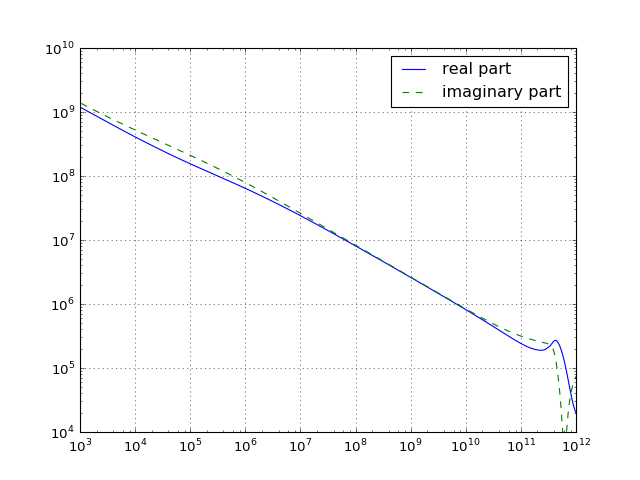

In [21]:
#print 'Loading from impedance database...'+scenario
root_result=ResultDir+'BS_coll_3TeVV1/'

imp_mod=[]; wake_mod=[];
suffix='_FCChh_Allthemachine_'+Estr+'_halfgap_13mm.dat';
freq_mod,Z_mod=readZ(root_result+"Zxdip"+suffix);
#Z_mod*=imp_fact

imp_mod.append(impedance_wake(a=1,b=0,c=0,d=0,plane='x',var=freq_mod,func=Z_mod));

#freq_mod,Z_mod=readZ(root_result+"Zydip"+suffix);
#Z_mod*=imp_fact


#imp_mod.append(impedance_wake(a=0,b=1,c=0,d=0,plane='y',var=freq_mod,func=Z_mod));

imp_mod_list.append(imp_mod);
wake_mod_list.append(wake_mod);



#Puting the impedance inside a list
Zlist_RW_R = deepcopy(imp_mod[0].func[::nevery,:])
freqlist_RW_R = deepcopy(imp_mod[0].var[::nevery])

#Impedance plot
plt.close('all')

plt.figure(1)
plt.loglog(freqlist_RW_R, Zlist_RW_R[:,0], '-b',label='real part')
plt.loglog(freqlist_RW_R, Zlist_RW_R[:,1], '--g',label='imaginary part')
plt.xlim([1.0e3,1.0e12])
plt.ylim([1.0e4,1.0e10])
#plt.grid()
plt.legend()
plt.grid()

plt.show()

Effective impedance, from Sacherer

### B2) Model: Beam screen + Holes + Collimators
BSH_coll_3TeV

<IPython.core.display.Javascript object>


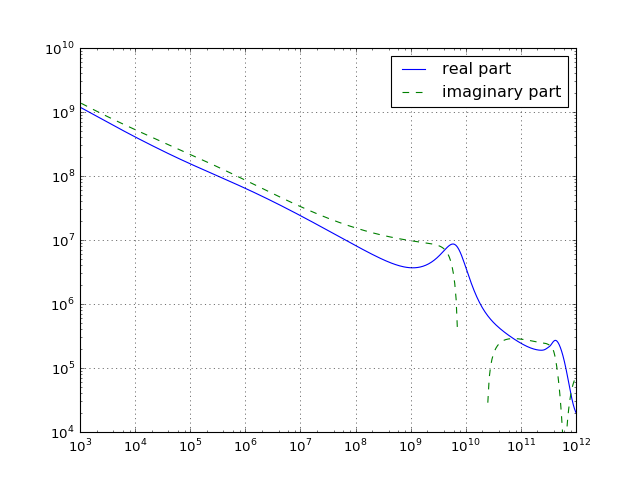

In [22]:
#print 'Loading from impedance database...'+scenario
root_result=ResultDir+'BSH_coll_3TeV_V1/'

imp_mod=[]; wake_mod=[];
suffix='_FCChh_Allthemachine_'+Estr+'_halfgap_13mm.dat';
freq_mod,Z_mod=readZ(root_result+"Zxdip"+suffix);
#Z_mod*=imp_fact

imp_mod.append(impedance_wake(a=1,b=0,c=0,d=0,plane='x',var=freq_mod,func=Z_mod));

#freq_mod,Z_mod=readZ(root_result+"Zydip"+suffix);
#Z_mod*=imp_fact


#imp_mod.append(impedance_wake(a=0,b=1,c=0,d=0,plane='y',var=freq_mod,func=Z_mod));

imp_mod_list.append(imp_mod);
wake_mod_list.append(wake_mod);



#Puting the impedance inside a list
Zlist_RW_R = deepcopy(imp_mod[0].func[::nevery,:])
freqlist_RW_R = deepcopy(imp_mod[0].var[::nevery])

#Impedance plot
plt.close('all')

plt.figure(1)
plt.loglog(freqlist_RW_R, Zlist_RW_R[:,0], '-b',label='real part')
plt.loglog(freqlist_RW_R, Zlist_RW_R[:,1], '--g',label='imaginary part')
plt.xlim([1.0e3,1.0e12])
plt.ylim([1.0e4,1.0e10])
#plt.grid()
plt.legend()
plt.grid()

plt.show()

Effective impedance, from Sacherer

### B3) Model: Beam Screen + Collimators + Interconnects

BS_coll_interconnects_3TeV

Q= 86001 (interco)

fr = 3.05GHz

Rs x =  350 kOhm/m

Rs y =  350 kOhm/m

<IPython.core.display.Javascript object>


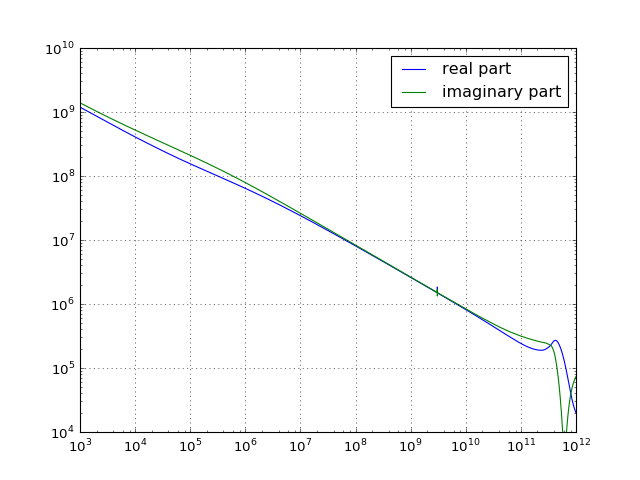

In [24]:
#print 'Loading from impedance database...'+scenario
root_result=ResultDir+'BS_coll_interconnects_3TeVV1/'

imp_mod=[]; wake_mod=[];
suffix='_FCChh_Allthemachine_'+Estr+'_halfgap_13mm.dat';
freq_mod,Z_mod=readZ(root_result+"Zxdip"+suffix);
#Z_mod*=imp_fact

imp_mod.append(impedance_wake(a=1,b=0,c=0,d=0,plane='x',var=freq_mod,func=Z_mod));

#freq_mod,Z_mod=readZ(root_result+"Zydip"+suffix);
#Z_mod*=imp_fact


#imp_mod.append(impedance_wake(a=0,b=1,c=0,d=0,plane='y',var=freq_mod,func=Z_mod));

imp_mod_list.append(imp_mod);
wake_mod_list.append(wake_mod);



#Puting the impedance inside a list
Zlist_RW_R = deepcopy(imp_mod[0].func[::nevery,:])
freqlist_RW_R = deepcopy(imp_mod[0].var[::nevery])

#Impedance plot
plt.close('all')

plt.figure(1)
plt.loglog(freqlist_RW_R, Zlist_RW_R[:,0], '-b',label='real part')
plt.loglog(freqlist_RW_R, Zlist_RW_R[:,1], '-g',label='imaginary part')

plt.xlim([1.0e3,1.0e12])
plt.ylim([1.0e4,1.0e10])
plt.grid()
plt.legend()

plt.show()

### B4) Model: Beam Screen + Holes + Collimators + Interconnects

BSH_coll_interconnects_3TeV

Q= 86001 (interco)

fr = 3.05GHz

Rs x =  350 kOhm/m

Rs y =  350 kOhm/m

<IPython.core.display.Javascript object>


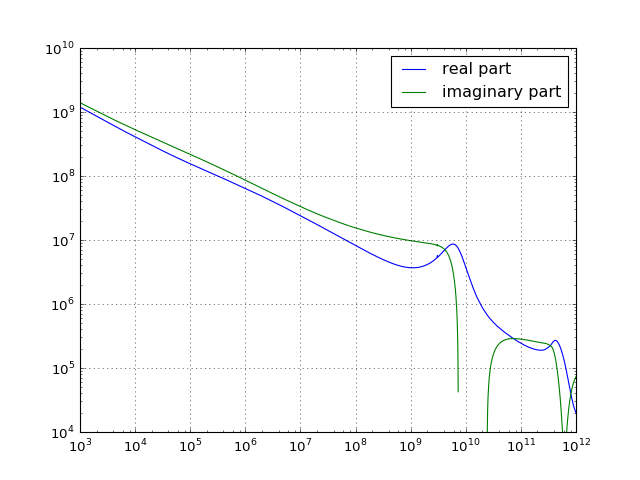

In [25]:
#print 'Loading from impedance database...'+scenario
root_result=ResultDir+'BSH_coll_interconnects_3TeVV1/'

imp_mod=[]; wake_mod=[];
suffix='_FCChh_Allthemachine_'+Estr+'_halfgap_13mm.dat';
freq_mod,Z_mod=readZ(root_result+"Zxdip"+suffix);
#Z_mod*=imp_fact

imp_mod.append(impedance_wake(a=1,b=0,c=0,d=0,plane='x',var=freq_mod,func=Z_mod));

#freq_mod,Z_mod=readZ(root_result+"Zydip"+suffix);
#Z_mod*=imp_fact


#imp_mod.append(impedance_wake(a=0,b=1,c=0,d=0,plane='y',var=freq_mod,func=Z_mod));

imp_mod_list.append(imp_mod);
wake_mod_list.append(wake_mod);



#Puting the impedance inside a list
Zlist_RW_R = deepcopy(imp_mod[0].func[::nevery,:])
freqlist_RW_R = deepcopy(imp_mod[0].var[::nevery])

#Impedance plot
plt.close('all')

plt.figure(1)
plt.loglog(freqlist_RW_R, Zlist_RW_R[:,0], '-b',label='real part')
plt.loglog(freqlist_RW_R, Zlist_RW_R[:,1], '-g',label='imaginary part')

plt.xlim([1.0e3,1.0e12])
plt.ylim([1.0e4,1.0e10])
plt.grid()
plt.legend()

plt.show()

# C) MoGr collimators
Collimators settings stay the same, only the material is modified (C => MoGr)